# Recommender Systems with Python
Welcome Recommender Systems with Python. Here we will develop basic recommendation systems using Python and pandas. 

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

Let's get started!

In [11]:
import pandas as pd
import numpy as np

In [12]:
colums_name=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("u.data",sep="\t",names=colums_name)

In [13]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [14]:
movie_titles=pd.read_csv("Movie_Id_Titles")

In [15]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We will merge the movies titles and df so that we do not need to deal with item_id.

In [16]:
df=pd.merge(df,movie_titles,on="item_id")

In [17]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Now we will create a dataframe with average rating and numbers of rating 

In [20]:
df.groupby("title")["rating"].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

So these are the top 10 movies with 5 star rating however, we grouped by rating so there is a change that these movies have got 5 star rating but it could have only been 1 review.

### Now we will create a dataframe with count of reviews and numbers of rating

In [21]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

So these are the movies with highest numbers of reviews.

### Let's Create a datarams with rating of movie

In [24]:
ratings=pd.DataFrame(df.groupby("title")["rating"].mean())

In [25]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now lets go ahead and create a number of rating on the raing datafram

In [26]:
ratings["Num of ratings"]=pd.DataFrame(df.groupby("title")["rating"].count())

In [28]:
ratings.head()

,rating,Num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now lets explore and visualize the dataframe 

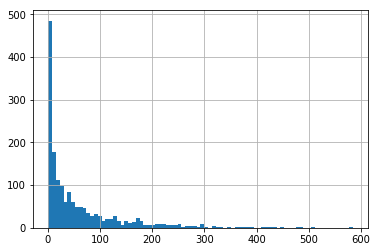

In [31]:
ratings["Num of ratings"].hist(bins=80)

Looks like the most of the movies have 0 or less than 5 reviews >

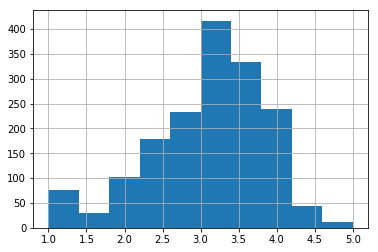

In [34]:
ratings["rating"].hist(bins=10)

Now lets see the number of rating and actual rating 

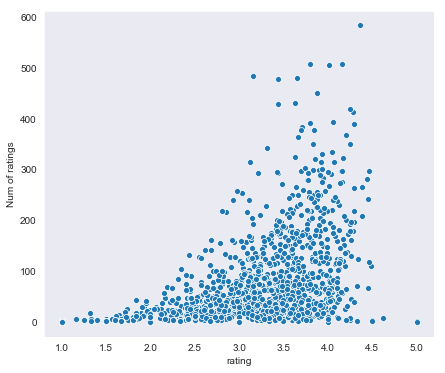

In [41]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="rating",y="Num of ratings",data=ratings)
sns.set_style("ticks")

This makes sense as we can see the number of review increases the rating increases as well ..

### Now lets go ahead and create the matrix that has user id on one axis and movie title on another axis.

In [43]:
moviemat=df.pivot_table(index="user_id",columns="title",values="rating")

In [44]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the values looks empty , thats because not all users see all the movies.

### Now lets find the most rated movies and build a recommended system on them.

In [46]:
ratings.sort_values("Num of ratings",ascending=False).head()

,rating,Num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Now we will choose two movies Star Wars and Liar Liar and grab the user rating for thses two movies:

In [48]:
starwars_user_rating=moviemat["Star Wars (1977)"]
liarliar_user_rating=moviemat["Liar Liar (1997)"]

Now lets use corewith function to find a corelation between 1. Star Wars 1977, 2. Lila Liar  and other movies:

In [50]:
similar_to_starwars=moviemat.corrwith(starwars_user_rating)

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [51]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_rating)

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [55]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=["Correlation"]).dropna()

In [56]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=["Correlation"]).dropna()

Lets see these dataframes : It's shows how corelated are the movies with Star wars and LiarLiar 

In [57]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [58]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


So now lets short these dataframe and get the most similar movies:

In [62]:
corr_starwars.sort_values(by="Correlation",ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


According to our model, the person who watched Star wars is 100% likely to watch COmmandments. However ,this does not make sense.Most likely this these movie happen to have been seen by only one other person who also happen to rate Star Wars 5 star.

Lets fix this by sorting the movies with less than 80 reviews( we got this number looking out histogram chart above),
thats where it gets serious decline.

In [63]:
corr_starwars=corr_starwars.join(ratings['Num of ratings'])

In [73]:
corr_starwars.head()

,Correlation,Num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


## Now lets filer out any movies that does not have al least 80 Ratings

In [74]:
starwars_recommendation=corr_starwars[corr_starwars["Num of ratings"]>80].sort_values(by="Correlation",ascending=False)

In [76]:
starwars_recommendation.head()

,Correlation,Num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


#### Concluson:Now this makes complete sense : As we can tell the person who watched Star Wasrs is most likely to watch Empire Strikes Back

Now lets explore Liar Liar :

In [70]:
corr_liarliar=corr_liarliar.join(ratings['Num of ratings'])

In [75]:
liarliar_recommendation=corr_liarliar[corr_liarliar["Num of ratings"]>80].sort_values(by="Correlation",ascending=False)

In [77]:
liarliar_recommendation.head()

,Correlation,Num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101


### Concluson:Now this makes complete sense : As we can tell the person who watched LIAR LIAR is most likely to watch BATMAN Forever.